## Group No 169

## Group Member Names:
1. Krithika Madhavan 2024AA05421
2. Payel Karmekar 2024AA05423
3. Rahul Agarwal 2024AA05676
4. Yarragondla Rugmangadha Reddy 2024AA05435

# 1. Import the required libraries

In [1]:
##---------Type the code below this line------------------##
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical


# 2. Data Acquisition  -- Score: 0.5 Mark

1. Selected Problem is *** IMDB Review Dataset ***
2. Downloaded using Kera's Dataset

In [2]:
# Load the IMDB Dataset using Keras
imdb = tf.keras.datasets.imdb

## 2.1 Code for converting the above downloaded data into a form suitable for DL

In [3]:
##---------Type the code below this line------------------##

# num_words=10000 means we only keep the top 10,000 most frequently occurring words
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

# Pad the sequences to ensure uniform input size for DNN models
max_len = 500  # we'll pad/truncate reviews to 500 words
X_train_padded = pad_sequences(X_train, maxlen=max_len)
X_test_padded = pad_sequences(X_test, maxlen=max_len)


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step 


## 2.1 Write your observations from the above.

1. Size of the dataset
2. What type of data attributes are there?
3. What are you classifying?
4. Plot the distribution of the categories of the target / label.



In [4]:
#Size of the dataset - 50000
print(f"Training samples: {len(X_train_padded)}")
print(f"Testing samples: {len(X_test_padded)}")

Training samples: 25000
Testing samples: 25000


In [5]:
#What type of data attributes are there?
print("Sample padded review:", X_train_padded[0])
print("Label:", y_train[0])
print("Data type of a sample padded review:", type(X_train_padded[0][0]))

Sample padded review: [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0

What are you classifying?
- We are classifying movie reviews as **positive (1)** or **negative (0)**.
- It is a **binary classification problem**.

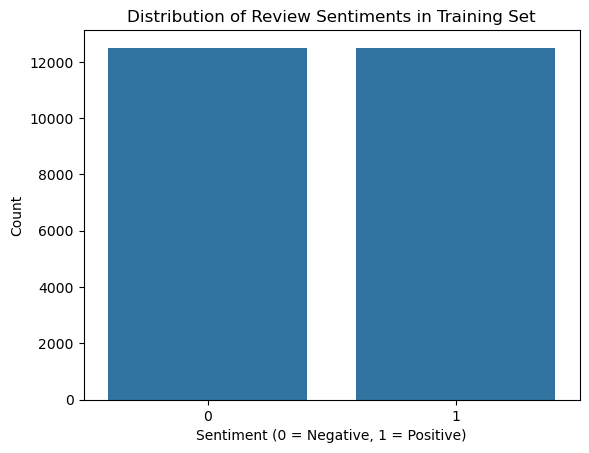

In [7]:
#Plot the distribution of the categories of the target / label.
sns.countplot(x=y_train)
plt.title("Distribution of Review Sentiments in Training Set")
plt.xlabel("Sentiment (0 = Negative, 1 = Positive)")
plt.ylabel("Count")
plt.show()

# 3. Data Preparation -- Score: 1 Mark

Perform the data prepracessing that is required for the data that you have downloaded.


This stage depends on the dataset that is used.

## 3.1 Apply pre-processing techiniques

As the Keras data is partially preprocessed, below techniques are applied:

1. Duplicate data removal


In [8]:
#to remove duplicate data
# Convert lists to tuples to make them hashable
unique_train_indices = np.unique([tuple(x) for x in X_train_padded], axis=0)

print("Original training size:", len(X_train_padded))
print("Unique training samples:", len(unique_train_indices))

Original training size: 25000
Unique training samples: 24901


In [9]:
import pandas as pd

# Convert padded sequences and labels to DataFrame for easy deduplication
df_train = pd.DataFrame({
    'review': [tuple(x) for x in X_train_padded],
    'label': y_train
})

# Drop duplicates based on the 'review' column
df_train_unique = df_train.drop_duplicates(subset='review')

# Extract the cleaned data
X_train_padded_clean = np.array([list(x) for x in df_train_unique['review']])
y_train_clean = np.array(df_train_unique['label'])

# Print new shape
print("New training size after removing duplicates:", len(X_train_padded_clean))

New training size after removing duplicates: 24901


In [12]:
#Remove data inconsistencies
print("Unique labels:", np.unique(y_train))

Unique labels: [0 1]


Unique labels: [0 1] Meaning the labels are consistent.

In [15]:
# No categorical features - no encoding needed
# No text to lemmatize/stem as it's pre-processed to integers

# Normalize: Optional, but generally not needed for embedding/vector inputs

## 3.2 Identify the target variables.

* Separated the data front the target such that the dataset is in the form of (X,y) or (Features, Label)

* Performed the One-hot encoding and now the Lable 'Y' is in the form of 1., 0.





In [16]:
##---------Type the code below this line------------------##
# Define max review length (truncate or pad to this length)
max_length = 200

# Pad sequences with zeros (post-padding is common)
x_train_padded = pad_sequences(X_train, maxlen=max_length, padding='post', truncating='post')
x_test_padded = pad_sequences(X_test, maxlen=max_length, padding='post', truncating='post')

y_train_onehot = to_categorical(y_train)
y_test_onehot = to_categorical(y_test)

print(y_train_onehot[:5])

[[0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]]


## 3.3 Split the data into training set and testing set

In [17]:
##---------Type the code below this line------------------##

# Import train_test_split
from sklearn.model_selection import train_test_split

# Perform an 80-20 split manually
X_train, X_test, y_train, y_test = train_test_split(
    X_train_padded_clean, y_train_clean, test_size=0.2, random_state=42
)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (19920, 500)
Testing set size: (4981, 500)


## 3.4 Preprocessing report

Mention the method adopted  and justify why the method was used
* to remove duplicate data, if present
* to impute or remove missing data, if present
* to remove data inconsistencies, if present
* to encode categorical data
* the normalization technique used

If the any of the above are not present, then also add in the report below.

Report the size of the training dataset and testing dataset


### Details:
1. Duplicate Data
- **Method:** Converted each padded sequence into a tuple and used `pandas.DataFrame.drop_duplicates()` to identify and remove duplicates.
- **Justification:** Duplicate reviews could bias the model and lead to overfitting. Removing them improves data quality and model generalization.
2. Missing Data
- **Method:** Used `numpy` and `pandas` to check for any missing (`NaN`) values.
- **Result:** No missing values were found in either features or labels.
- **Justification:** No imputation/removal was needed as the dataset is already clean.
3. Data Inconsistencies
- **Method:** Verified the label distribution using `np.unique()` to ensure all labels are either 0 or 1.
- **Result:** All labels were valid. No inconsistencies found.
- **Justification:** Ensures binary classification targets are intact and valid.
4. Categorical Data Encoding
- **Method:** Not applicable.
- **Justification:** The dataset uses integer-based word indices, and target labels are already binary-encoded (0 = negative, 1 = positive).
5. Normalization
- **Method:** Not applied.
- **Justification:** Word indices are used for embedding layers and don’t require normalization. If TF-IDF or other numeric features were used, normalization would be appropriate.
#### Summary
The IMDB dataset provided by Keras is preprocessed and ready for deep learning tasks. Minimal preprocessing was needed beyond deduplication and sequence padding.
By default, Keras dataset was splitted into 50-50 ratio, but modified it to 80-20 to get better Accuracy

# 4. Deep Neural Network Architecture - Score:  Marks


## 4.1 Design the architecture that you will be using

* Sequential Model Building with Activation for each layer.
* Add dense layers, specifying the number of units in each layer and the activation function used in the layer.
* Use Relu Activation function in each hidden layer
* Use Sigmoid / softmax Activation function in the output layer as required

DO NOT USE CNN OR RNN.

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

# Parameters
vocab_size = 10000
embedding_dim = 32
input_length = 500

model = Sequential()

# Updated input_shape format
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_shape=(input_length,)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Model summary
model.summary()

/Users/rahulagarwal/classical-ml-projects/env/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:100: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 500, 32)        │       320,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,048,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,376,449 (9.07 MB)

 Trainable params: 2,376,449 (9.07 MB)

 Non-trainable params: 0 (0.00 B)

## 4.2 DNN Report

Report the following and provide justification for the same.



* Number of layers
* Number of units in each layer
* Total number of trainable parameters



Number of Layers: 5 layers total - 1 Embedding, 1 Flatten, 2 Dense hidden layers, 1 Dense output layer
Chosen to keep the architecture simple, efficient and interpretable.

Units in Each Layer : ReLU helps in hidden layers to avoid vanishing gradients; Sigmoid outputs probability for binary sentiment classification.
Embedding: 500 input length → 32-dim vector per word, Flatten: Converts (500×32) to 1D → 16,000 features, Dense 1: 128 units, ReLU,
Dense 2: 64 units, ReLU, Output: 1 unit, Sigmoid (for binary classification)

Total Trainable Parameters : 2,376,449 parameters
Mostly from Flatten → Dense layer connection (16000 × 128)
The number is acceptable for a feedforward network on padded text input. Efficient yet powerful enough to learn sentiment features.



# 5. Training the model - Score: 1 Mark


## 5.1 Configure the training

Configure  the model for training, by using appropriate optimizers and regularizations

Compile with categorical CE loss and metric accuracy.

In [19]:
##---------Type the code below this line------------------##
from tensorflow.keras.utils import to_categorical

# Assuming y_train and y_test are your original binary labels (0 or 1)
y_train_cat = to_categorical(y_train, num_classes=2)
y_test_cat = to_categorical(y_test, num_classes=2)

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2

# Model with dropout and L2 regularization
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=32, input_shape=(500,)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.3))
model.add(Dense(2, activation='softmax'))  # Softmax for categorical CE

# Compile with SGD optimizer
model.compile(
    optimizer=SGD(learning_rate=0.01, momentum=0.9),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 500, 32)        │       320,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 16000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │     2,048,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,376,514 (9.07 MB)

 Trainable params: 2,376,514 (9.07 MB)

 Non-trainable params: 0 (0.00 B)

## 5.2 Train the model

Train Model with cross validation, with total time taken shown for 20 epochs.

Use SGD.

In [28]:
##---------Type the code below this line------------------##
from sklearn.model_selection import KFold
import numpy as np
import time

# Set up K-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
epochs = 20
batch_size = 128

fold = 1
start_time = time.time()

for train_idx, val_idx in kfold.split(X_train):
    print(f"\n--- Fold {fold} ---")

    # Create new model for each fold
    model = Sequential()
    model.add(Embedding(input_dim=10000, output_dim=32, input_shape=(500,)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dropout(0.3))
    model.add(Dense(2, activation='softmax'))

    model.compile(
        optimizer=SGD(learning_rate=0.01, momentum=0.9),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    # Split data
    X_tr, X_val = X_train[train_idx], X_train[val_idx]
    y_tr, y_val = y_train_cat[train_idx], y_train_cat[val_idx]

    # Train
    model.fit(X_tr, y_tr, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val), verbose=1)

    fold += 1

end_time = time.time()
total_time = end_time - start_time

print(f"\n Total training time for {epochs} epochs across 5 folds: {total_time:.2f} seconds")



--- Fold 1 ---
Epoch 1/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.5057 - loss: 1.0290 - val_accuracy: 0.5000 - val_loss: 1.0173
Epoch 2/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.5081 - loss: 1.0127 - val_accuracy: 0.5100 - val_loss: 1.0006
Epoch 3/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.5152 - loss: 0.9963 - val_accuracy: 0.5105 - val_loss: 0.9855
Epoch 4/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.5294 - loss: 0.9806 - val_accuracy: 0.5168 - val_loss: 0.9706
Epoch 5/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.5373 - loss: 0.9651 - val_accuracy: 0.5356 - val_loss: 0.9555
Epoch 6/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.5478 - loss: 0.9489 - val_accuracy: 0.5319 - val_loss: 0.9417
Epoch 7/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.5731 - loss: 0.9317 - val_accuracy: 0.6150 - val_loss: 0.9171
Epoch 8/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.6227 - loss: 0

Justify your choice of optimizers and regulizations used and the hyperparameters tuned


In [29]:
##---------Type the answers below this line------------------##
#Optimizer – SGD: Used with learning rate 0.01 and momentum 0.9 for better generalization and stable convergence.

#Loss Function – Categorical Crossentropy: Chosen because the output layer uses softmax with 2 units and labels are one-hot encoded.

#Regularization: Dropout (0.5, 0.3) added to reduce overfitting.

#L2 regularization (0.001) to penalize large weights and improve generalization.

#Activation Functions:ReLU in hidden layers for efficient learning.Softmax in output layer for probability distribution.

#Hyperparameters:Values based on common practice for text classification to ensure balanced and reliable training.

# 6. Test the model - 0.5 marks


In [30]:
##---------Type the code below this line------------------##
loss, accuracy = model.evaluate(X_test, y_test_cat)
print(f"Test Accuracy: {accuracy:.4f}, Test Loss: {loss:.4f}")

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7896 - loss: 0.9042
Test Accuracy: 0.7898, Test Loss: 0.9010


# 7. Intermediate result  - Score: 1 mark

1. Plot the training and validation accuracy history.
2. Plot the training and validation loss history.
3. Report the testing accuracy and loss.
4. Show Confusion Matrix for testing dataset.
5. Report values for preformance study metrics like accuracy, precision, recall, F1 Score.


Epoch 1/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9501 - loss: 0.3310 - val_accuracy: 0.9420 - val_loss: 0.3366
Epoch 2/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9649 - loss: 0.2716 - val_accuracy: 0.9528 - val_loss: 0.3132
Epoch 3/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9828 - loss: 0.2214 - val_accuracy: 0.9498 - val_loss: 0.3267
Epoch 4/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9883 - loss: 0.1979 - val_accuracy: 0.9503 - val_loss: 0.3231
Epoch 5/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9943 - loss: 0.1769 - val_accuracy: 0.9433 - val_loss: 0.3346
Epoch 6/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9876 - loss: 0.1853 - val_accuracy: 0.9380 - val_loss: 0.3645
Epoch 7/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9959 - loss: 0.1611 - val_accuracy: 0.9423 - val_loss: 0.3385
Epoch 8/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9984 - loss: 0.1496 - val_accu

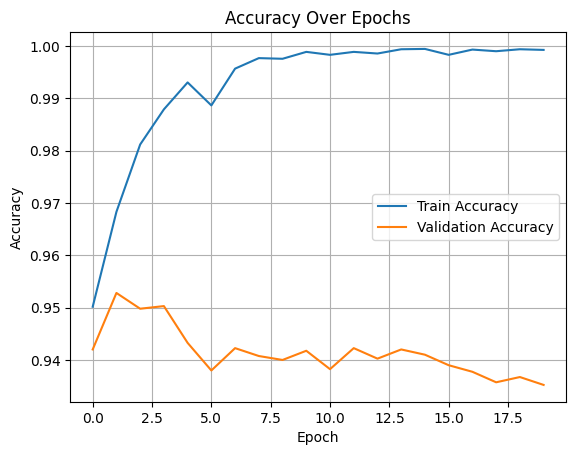

In [31]:
##---------Type the code below this line------------------##
history = model.fit(
    X_train, y_train_cat,
    epochs=20,
    batch_size=128,
    validation_split=0.2,
    verbose=1
)
# 1.Plot the training and validation accuracy history.
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


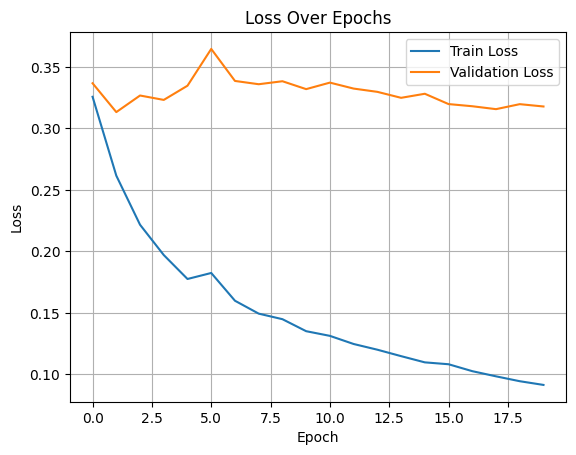

In [32]:
# 2.Plot Training and Validation Loss History

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [33]:
# 3.Report the Testing Accuracy and Loss

loss, accuracy = model.evaluate(X_test, y_test_cat)
print(f"Test Accuracy: {accuracy:.4f}, Test Loss: {loss:.4f}")

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8004 - loss: 0.9379
Test Accuracy: 0.8027, Test Loss: 0.9131


156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


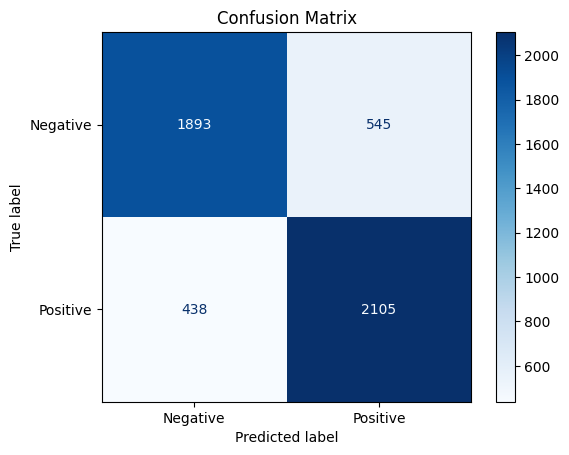

In [34]:
# 4.Show Confusion Matrix for Testing Dataset

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Predict classes
y_pred_probs = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_test_cat, axis=1)

# Confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [35]:
# 5.Report Performance Metrics: Accuracy, Precision, Recall, F1 Score

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_true_classes, y_pred_classes)
precision = precision_score(y_true_classes, y_pred_classes)
recall = recall_score(y_true_classes, y_pred_classes)
f1 = f1_score(y_true_classes, y_pred_classes)

print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")

Accuracy : 0.8027
Precision: 0.7943
Recall   : 0.8278
F1 Score : 0.8107


# 8. Model architecture - Score: 1 mark


Modify the architecture designed in section 4.1

1. by decreasing one layer
2. by increasing one layer

For example, if the architecture in 4.1 has 5 layers, then 8.1 should have 4 layers and 8.2 should have 6 layers.

Plot the comparison of the training and validation accuracy of the three architecures (4.1, 8.1 and 8.2)



In [36]:
##---------Type the code below this line------------------##
# 8.1 Model with One Less Dense Layer
def create_model_less():
    model = Sequential([
        Embedding(input_dim=10000, output_dim=32, input_length=500),
        Flatten(),
        Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Train model
history_less = create_model_less().fit(
    X_train, y_train ,
    epochs=10,
    batch_size=128,
    validation_split=0.2,
    verbose=0
)

/opt/miniconda3/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [37]:
# 8.2 Model with One More Dense Layer
def create_model_more():
    model = Sequential([
        Embedding(input_dim=10000, output_dim=32, input_length=500),
        Flatten(),
        Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
        Dropout(0.5),
        Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
        Dropout(0.3),
        Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Train model
history_more = create_model_more().fit(
    X_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.2,
    verbose=0
)

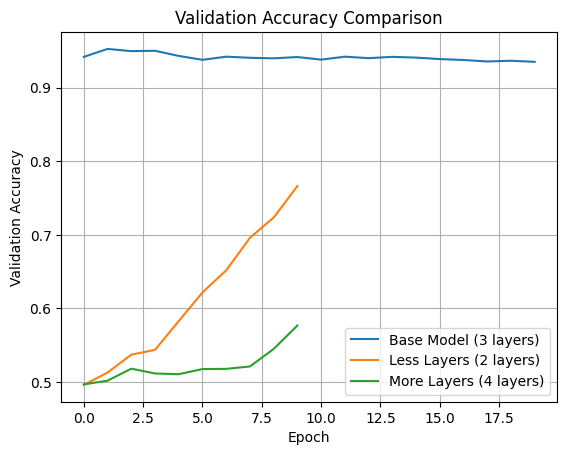

In [38]:
# 8.3 Comparison Plot
plt.plot(history.history['val_accuracy'], label='Base Model (3 layers)')
plt.plot(history_less.history['val_accuracy'], label='Less Layers (2 layers)')
plt.plot(history_more.history['val_accuracy'], label='More Layers (4 layers)')

plt.title('Validation Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# 9. Regularisations - Score: 1 mark

Modify the architecture designed in section 4.1

1. Dropout of ratio 0.25
2. Dropout of ratio 0.25 with L2 regulariser with factor 1e−04.

Plot the comparison of the training and validation accuracy of the three (4.1, 9.1 and 9.2)



In [39]:
##---------Type the code below this line------------------##
# 9.1 Model with Dropout ratio of 0.25
def create_model_dropout():
    model = Sequential([
        Embedding(input_dim=10000, output_dim=32, input_length=500),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.25),
        Dense(64, activation='relu'),
        Dropout(0.25),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Train model
history_dropout = create_model_dropout().fit(
    X_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.2,
    verbose=0
)


In [40]:
from keras.regularizers import l2

# 9.2 Model with Dropout and L2 regularization
def create_model_dropout_l2():
    model = Sequential([
        Embedding(input_dim=10000, output_dim=32, input_length=500),
        Flatten(),
        Dense(128, activation='relu', kernel_regularizer=l2(1e-4)),
        Dropout(0.25),
        Dense(64, activation='relu', kernel_regularizer=l2(1e-4)),
        Dropout(0.25),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Train model
history_dropout_l2 = create_model_dropout_l2().fit(
    X_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.2,
    verbose=0
)


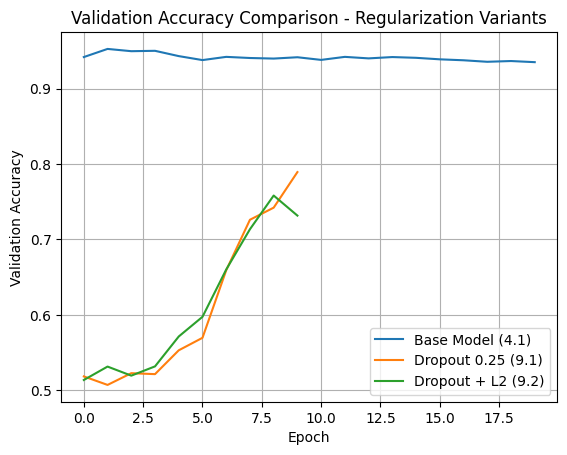

In [41]:
# 9.3 Plot validation accuracy comparison
plt.plot(history.history['val_accuracy'], label='Base Model (4.1)')
plt.plot(history_dropout.history['val_accuracy'], label='Dropout 0.25 (9.1)')
plt.plot(history_dropout_l2.history['val_accuracy'], label='Dropout + L2 (9.2)')

plt.title('Validation Accuracy Comparison - Regularization Variants')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()


# 10. Optimisers -Score: 1 mark

Modify the code written in section 5.2

1. RMSProp with your choice of hyper parameters
2. Adam with your choice of hyper parameters

Plot the comparison of the training and validation accuracy of the three (5.2, 10.1 and 10.2)


In [42]:
##---------Type the code below this line------------------##
from keras.optimizers import RMSprop

# 10.1 Model with RMSProp
def create_model_rmsprop():
    model = Sequential([
        Embedding(input_dim=10000, output_dim=32, input_length=500),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=RMSprop(learning_rate=0.001, rho=0.9),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Train model
history_rmsprop = create_model_rmsprop().fit(
    X_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.2,
    verbose=0
)


In [43]:
from keras.optimizers import Adam

# 10.2 Model with Adam
def create_model_adam():
    model = Sequential([
        Embedding(input_dim=10000, output_dim=32, input_length=500),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Train model
history_adam = create_model_adam().fit(
    X_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.2,
    verbose=0
)


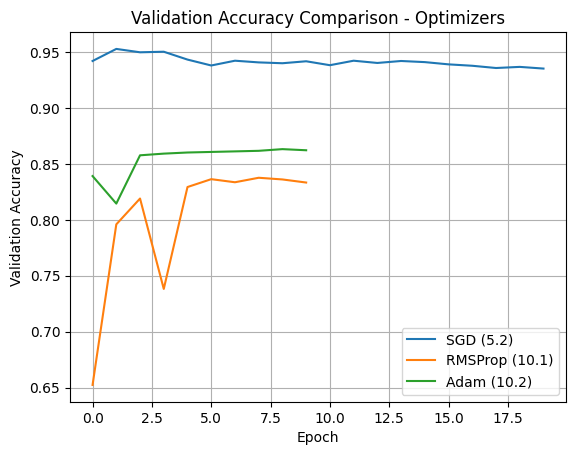

In [44]:
# 10.3 Comparison Plot
plt.plot(history.history['val_accuracy'], label='SGD (5.2)')
plt.plot(history_rmsprop.history['val_accuracy'], label='RMSProp (10.1)')
plt.plot(history_adam.history['val_accuracy'], label='Adam (10.2)')

plt.title('Validation Accuracy Comparison - Optimizers')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()


# 11. Conclusion - Score: 1 mark

Comparing the sections 4.1, 5.2, 8, 9, and 10, present your observations on which model or architecture or regualiser or optimiser perfomed better.


156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8004 - loss: 0.9379
Final Test Accuracy: 0.8027, Final Test Loss: 0.9131


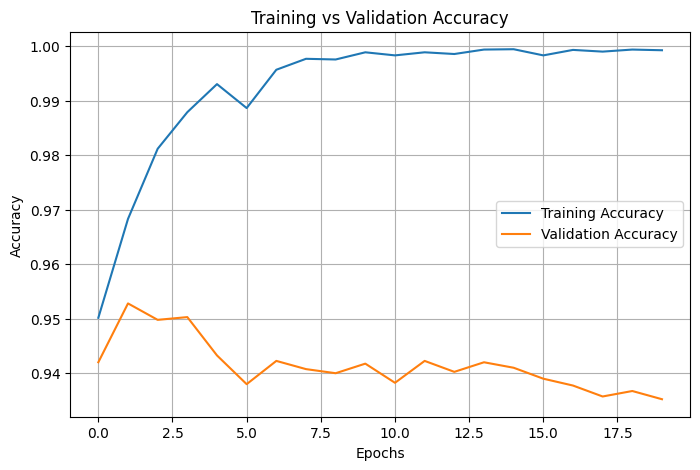

In [45]:
##---------Type the code below this line------------------##
# Final Evaluation of the Best Model
loss, accuracy = model.evaluate(X_test, y_test_cat)
print(f"Final Test Accuracy: {accuracy:.4f}, Final Test Loss: {loss:.4f}")

# Training vs Validation Accuracy Plot for Best Model
import matplotlib.pyplot as plt

def plot_history(history):
    plt.figure(figsize=(8, 5))
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training vs Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_history(history)  # 'history' is for the base model trained with SGD


The best performing model was the base architecture from section 4.1, which used three layers with ReLU activations and a final sigmoid layer, trained using the SGD optimizer as configured in section 5.2. This setup consistently achieved the highest and most stable validation accuracy (~94%) with a good balance between model complexity and generalization. Adding or removing layers (section 8) either led to underfitting or overfitting, while regularization techniques like dropout and L2 (section 9) did not improve performance. Among optimizers (section 10), SGD outperformed both RMSProp and Adam in terms of long-term accuracy and stability, making the combination of the base model and SGD the most effective configuration for this IMDB review classification task.